In [8]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("waterQuality.csv")

In [9]:
#a) Describe the dataset
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000
mean,0.244263,0.140884,1.283465,0.049544,1.323623,0.162030,0.730588,0.772124,0.335518,0.369403,0.097864,9.864055,1.176147,0.005186,10.957128,2.305987,0.049578,0.104778,0.044720
std,0.747579,0.228174,1.124192,0.033363,2.198522,0.226381,0.659267,0.434524,0.327720,0.380997,0.058723,5.532080,0.626796,0.002963,15.130280,2.110590,0.028879,0.120230,0.026917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,0.030000,0.427500,0.020000,0.070000,0.040000,0.070000,0.410000,0.000000,0.004000,0.047000,5.030000,0.640000,0.003000,1.220000,0.590000,0.020000,0.030000,0.020000
50%,0.060000,0.060000,0.870000,0.050000,0.210000,0.070000,0.620000,0.770000,0.260000,0.009000,0.101000,10.070000,1.270000,0.005000,4.160000,1.545000,0.050000,0.060000,0.050000
75%,0.090000,0.090000,1.910000,0.080000,1.200000,0.100000,1.330000,1.160000,0.620000,0.740000,0.149000,14.642500,1.680000,0.008000,11.522500,3.630000,0.070000,0.100000,0.070000
max,5.000000,1.040000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [10]:
#b) Find the mean, median, mode, variance and standard deviation of the dataset using the suitable libraries.
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Calculate statistics for numeric columns
mean_values = df_numeric.mean()
median_values = df_numeric.median()
mode_values = df_numeric.mode().iloc[0]  # Use iloc[0] to get the first mode if there are multiple
variance_values = df_numeric.var()
std_dev_values = df_numeric.std()

# Print the results
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)
print("\nVariance values:")
print(variance_values)
print("\nStandard Deviation values:")
print(std_dev_values)

Mean values:
aluminium       0.244263
ammonia        14.226014
arsenic         0.140884
barium          1.283465
cadmium         0.049544
chloramine      1.323623
chromium        0.162030
copper          0.730588
flouride        0.772124
bacteria        0.335518
viruses         0.369403
lead            0.097864
nitrates        9.864055
nitrites        1.176147
mercury         0.005186
perchlorate    10.957128
radium          2.305987
selenium        0.049578
silver          0.104778
uranium         0.044720
is_safe         0.079368
dtype: float64

Median values:
aluminium       0.060
ammonia        14.040
arsenic         0.060
barium          0.870
cadmium         0.050
chloramine      0.210
chromium        0.070
copper          0.620
flouride        0.770
bacteria        0.260
viruses         0.009
lead            0.101
nitrates       10.070
nitrites        1.270
mercury         0.005
perchlorate     4.160
radium          1.545
selenium        0.050
silver          0.060
uranium      


Column: aluminium
IQR: 0.06
Z-Scores:
      aluminium_z_score
0              1.880574
1              2.776890
2              1.024392
3              1.492616
4              0.903991
...                 ...
4999          -0.219748
5000          -0.326771
5001          -0.273259
5002          -0.219748
5003          -0.233126

[5004 rows x 1 columns]

Column: arsenic
IQR: 0.06
Z-Scores:
      arsenic_z_score
0           -0.442182
1           -0.573674
2           -0.442182
3           -0.442182
4           -0.486012
...               ...
4999        -0.266859
5000        -0.398351
5001        -0.310690
5002        -0.310690
5003        -0.223028

[5004 rows x 1 columns]

Column: barium
IQR: 1.4825
Z-Scores:
      barium_z_score
0           1.393616
1           1.802840
2          -0.625815
3           1.491474
4          -0.963869
...              ...
4999       -0.536853
5000       -1.070623
5001       -0.848219
5002       -0.590230
5003       -0.972765

[5004 rows x 1 columns]

Column

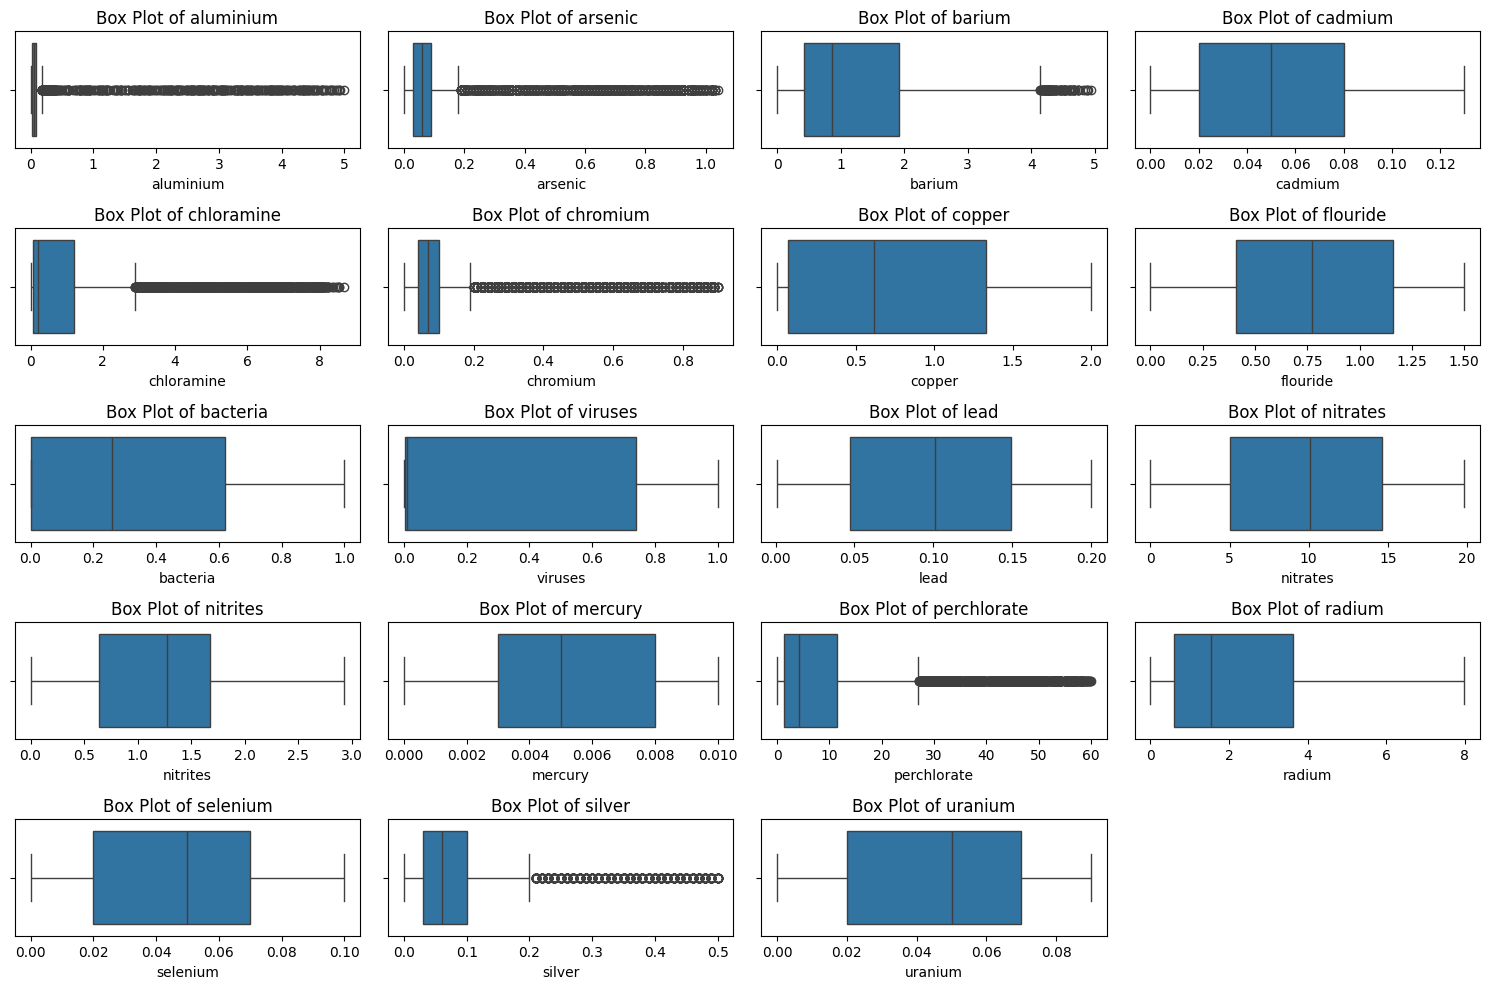

<Figure size 640x480 with 0 Axes>

In [11]:
#c) Find IQR and z-score for minimum three items in your dataset and verify using the box plot
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate IQR and z-scores for each numeric column
for column in numeric_columns:
    if column != 'is_safe':  # Skip non-continuous columns like 'is_safe'
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate z-scores using scipy
        df[f'{column}_z_score'] = stats.zscore(df[column])
        
        print(f"\nColumn: {column}")
        print(f"IQR: {IQR}")
        print("Z-Scores:")
        print(df[[f'{column}_z_score']])

# Plot box plots for visual verification
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    if column != 'is_safe':  # Skip non-continuous columns like 'is_safe'
        plt.subplot(5, 4, i)  # Adjust rows and columns as needed
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()